<a href="https://colab.research.google.com/github/rsrujan/BharatIntern-ML/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('/content/sample_data/housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [8]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: xlabel='latitude', ylabel='longitude'>

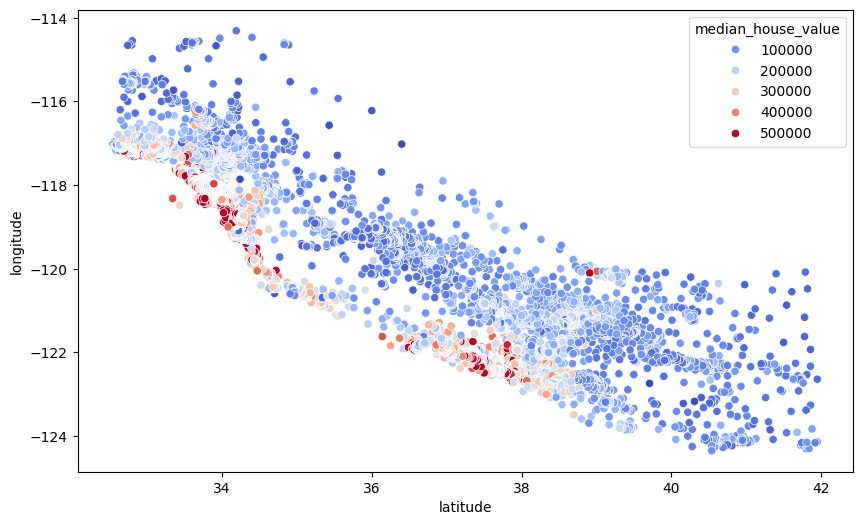

In [10]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='latitude', y='longitude', data=df, hue='median_house_value', palette='coolwarm')

In [11]:
df = df.drop(['longitude','latitude'], axis=1)

In [12]:
# using manual
# mapping = {'<1H OCEAN': 1,
#            'INLAND': 2,
#            'NEAR OCEAN': 3,
#            'NEAR BAY': 4,
#            'ISLAND': 5}
# df['ocean_proximity'] = df['ocean_proximity'].map(mapping)

# using label encoder
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

df['ocean_proximity'] = lb.fit_transform(df['ocean_proximity'])

df['ocean_proximity'].value_counts()

,count
ocean_proximity,
0,9136
1,6551
4,2658
3,2290
2,5


array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'ocean_proximity'}>, <Axes: >]],
      dtype=object)

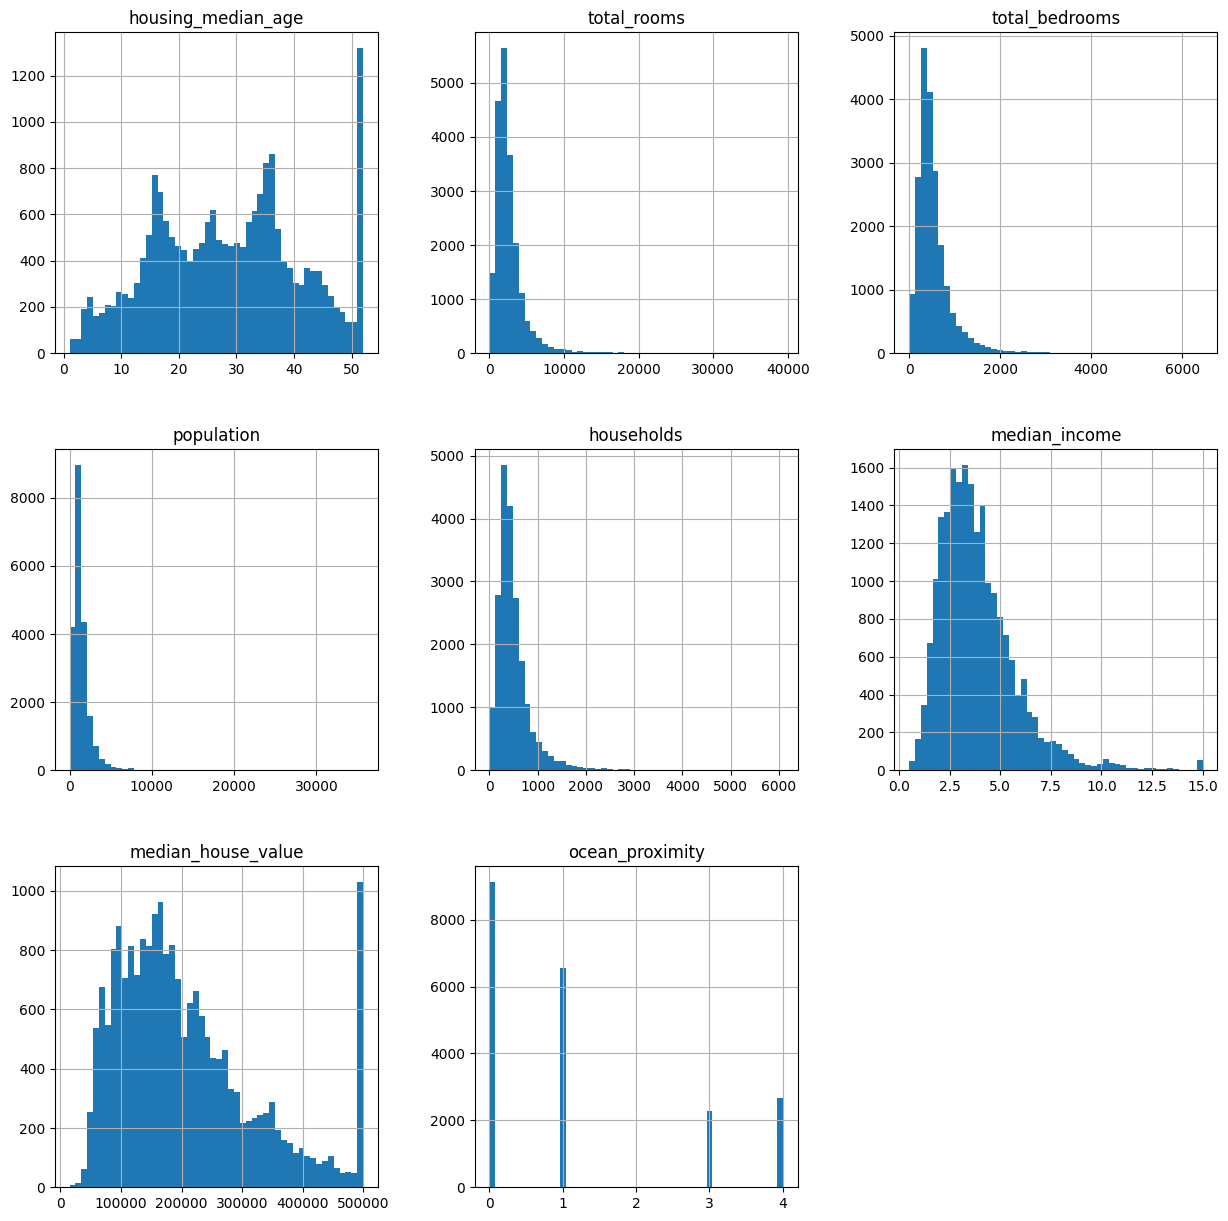

In [13]:
df.hist(bins=50, figsize=(15,15))

<Axes: >

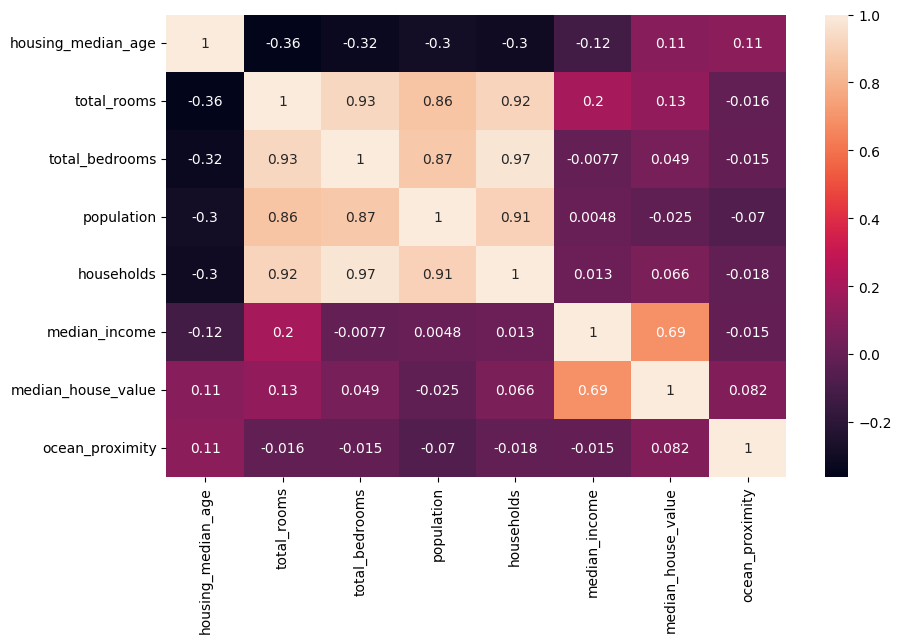

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [15]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_X = X.copy()

# VIF dataframe
vif_data = pd.DataFrame() # make new dataframe
vif_data["feature"] = vif_X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_X.values, i)
                          for i in range(len(vif_X.columns))]

print(vif_data.sort_values(by='VIF'))

              feature        VIF
6     ocean_proximity   1.688518
0  housing_median_age   3.921881
5       median_income   4.744257
3          population  15.584258
1         total_rooms  26.351065
2      total_bedrooms  66.988838
4          households  74.130054


In [17]:
X = df.drop(['households','total_bedrooms'], axis=1)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_X = X.copy()

# VIF dataframe
vif_data = pd.DataFrame() # make new dataframe
vif_data["feature"] = vif_X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_X.values, i)
                          for i in range(len(vif_X.columns))]

print(vif_data.sort_values(by='VIF'))

              feature        VIF
5     ocean_proximity   1.687977
0  housing_median_age   3.904598
3       median_income   8.740910
4  median_house_value   8.751347
2          population  10.296963
1         total_rooms  11.485604


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

In [21]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Training score: ', reg.score(X_train, y_train)) # return R^2 value
print('Testing score: ', reg.score(X_test, y_test))
print('RMSE: ', rmse)

Training score:  1.0
Testing score:  0.9992159475819136
RMSE:  3226.9774855508012
